In [31]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [18]:
dft = pd.read_csv('trackdata.csv')
dft.head()

,name,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,RAP DEVIL,286117,68,0.2170,0.895,0.839,0.000003,0.239,-4.512,0.2270,149.951,4
1,Another Day in Paradise - 2016 Remaster,322133,78,0.7360,0.780,0.565,0.002690,0.063,-7.320,0.0306,101.967,4
2,Jamming,211000,77,0.1020,0.934,0.467,0.000040,0.109,-10.990,0.3070,123.583,4
3,Mo Money Mo Problems (feat. Puff Daddy & Mase)...,257399,79,0.0128,0.845,0.884,0.000002,0.203,-4.506,0.0759,104.536,4
4,Drive - 2017 Remaster,234332,72,0.1150,0.261,0.703,0.000780,0.102,-7.871,0.0414,83.495,4


In [25]:
print(dft.dtypes)

name                 object
length                int64
popularity            int64
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
time_signature        int64
dtype: object


In [26]:
df = dft.drop(columns=['name'])
print(df.columns)

Index(['length', 'popularity', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'time_signature'],
      dtype='object')


In [30]:
x = df.values
scaled = MinMaxScaler().fit_transform(x)
df = pd.DataFrame(scaled)
df.head

<bound method NDFrame.head of              0     1         2         3         4         5         6  \
0     0.312983  0.68  0.217861  0.902968  0.844253  0.000003  0.236957   
1     0.369546  0.78  0.738952  0.771689  0.559755  0.002739  0.045652   
2     0.195013  0.77  0.102398  0.947489  0.458000  0.000041  0.095652   
3     0.267882  0.79  0.012839  0.845890  0.890977  0.000002  0.197826   
4     0.231656  0.72  0.115450  0.179224  0.703042  0.000794  0.088043   
...        ...   ...       ...       ...       ...       ...       ...   
4411  0.226569  0.74  0.257018  0.768265  0.489150  0.000000  0.297826   
4412  0.271087  0.70  0.011835  0.848174  0.390510  0.000000  0.284783   
4413  0.195264  0.83  0.301196  0.738584  0.839061  0.000018  0.363043   
4414  0.231197  0.70  0.014345  0.539954  0.571176  0.000000  0.631522   
4415  0.137207  0.79  0.309228  0.495434  0.513031  0.000000  0.209783   

             7         8         9    10  
0     0.844755  0.286014  0.636052  0.

In [33]:
pca = PCA(n_components=2)
dec = pca.fit_transform(df)
dec = pd.DataFrame(dec)
dec.columns = ['F1', 'F2']
dec.head

<bound method NDFrame.head of             F1        F2
0    -0.142889 -0.064325
1     0.522287 -0.030245
2     0.059344 -0.103459
3    -0.260233 -0.176056
4     0.001088 -0.057315
...        ...       ...
4411  0.156351 -0.047220
4412  0.025460 -0.024027
4413  0.008722 -0.170318
4414 -0.127071 -0.071451
4415  0.153093 -0.146215

[4416 rows x 2 columns]>

In [49]:
db = DBSCAN(eps=0.07, min_samples=65).fit(dec)
labels = db.labels_

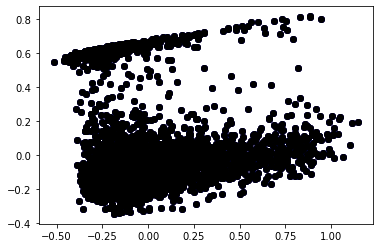

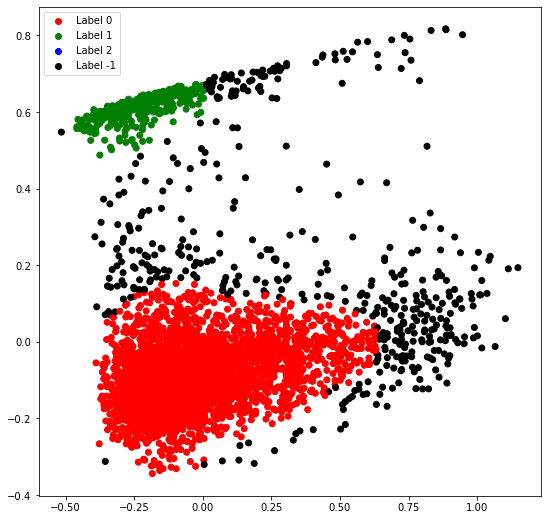

In [50]:
colours = {}
colours[0] = 'r'
colours[1] = 'g'
colours[2] = '2'
colours[-1] = 'k'

cvec = [colours[label] for label in labels]

r = plt.scatter(dec['F1'], dec['F2'], color ='r');
g = plt.scatter(dec['F1'], dec['F2'], color ='g');
b = plt.scatter(dec['F1'], dec['F2'], color ='b');
k = plt.scatter(dec['F1'], dec['F2'], color ='k');
  
plt.figure(figsize =(9, 9))
plt.scatter(dec['F1'], dec['F2'], c = cvec)
  
plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1'))
  
plt.show()